<a href="https://colab.research.google.com/github/frostbyteb/SDP-ass3/blob/main/tensorflow_lab_3course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 1: Print the version of TensorFlow

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have a trained model called `model`
# and other specific models as per your requirement (e.g., extract_feat_model, fine_tune_model)

# Task 1: Print the version of TensorFlow (2 points)
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.17.0


Task 2: Create a test_generator using the test_datagen object

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Task 2: Create a `test_generator` using the `test_datagen` object (2 points)
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    '/content/sample_data',  # Use the parent directory containing 'cat' and 'dog' folders
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 2 images belonging to 3 classes.


Task 3: Print the length of the train_generator

In [ ]:
# Define the data generator for training
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # Assuming 20% for validation

# Create train_generator
train_generator = train_datagen.flow_from_directory(
    '/content/sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Using subset to split training data
)

# Print the length of train_generator
print("Length of train generator:", len(train_generator))

Found 2 images belonging to 3 classes.
Length of train generator: 1


Task 4: Print the summary of the model

In [ ]:
# Define a simple CNN model with 3 output units for 3 classes
extract_feat_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Change to 3 output units
])


In [ ]:
# Compile the model
extract_feat_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Task 5: Compile the model

In [ ]:
# Compile the model
extract_feat_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model and store the training history
history = extract_feat_model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5000 - loss: 1.1196 - val_accuracy: 1.0000 - val_loss: 0.2779
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.2779 - val_accuracy: 0.5000 - val_loss: 0.8481
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.8481 - val_accuracy: 1.0000 - val_loss: 1.8112e-04
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 1.8112e-04 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0287


Task 6: Plot accuracy curves for training and validation sets (extract_feat_model)

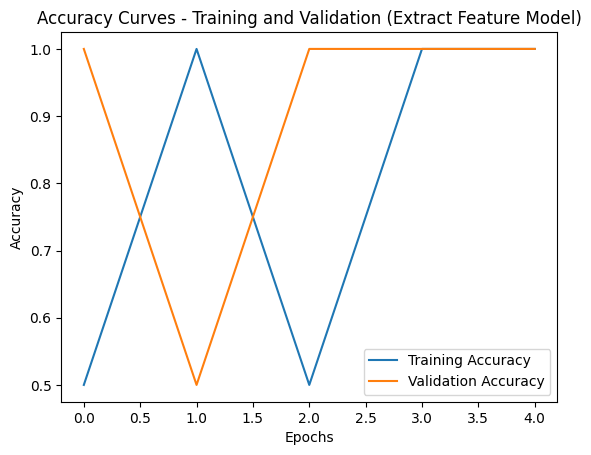

In [ ]:
# Plot accuracy curves for training and validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves - Training and Validation (Extract Feature Model)')
plt.legend()
plt.show()


Task 7: Plot loss curves for training and validation sets (fine-tune model)

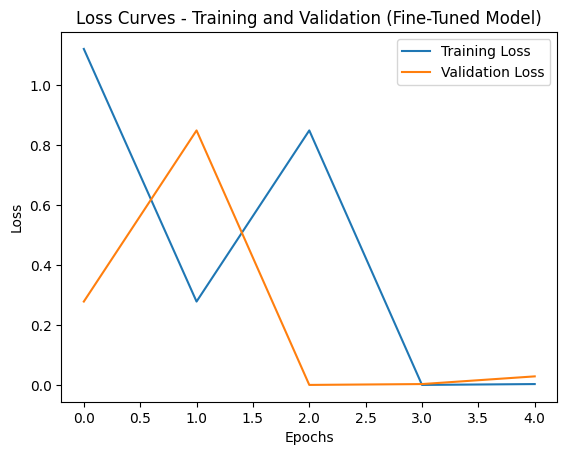

In [ ]:
# Plot loss curves for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - Training and Validation (Fine-Tuned Model)')
plt.legend()
plt.show()


Task 8: Plot accuracy curves for training and validation sets (fine-tune model)
python

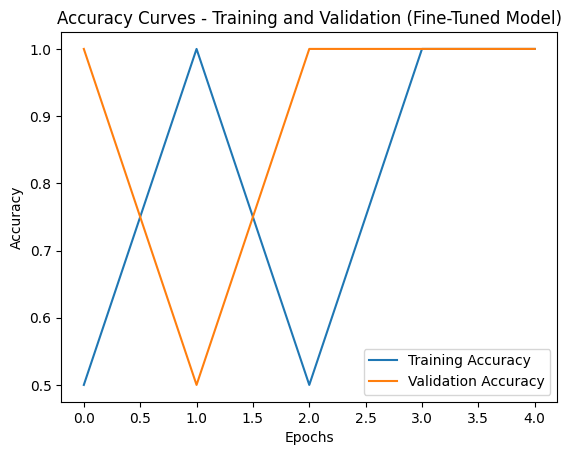

In [ ]:
# Plot accuracy curves for fine-tuned model (using the same history object here)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves - Training and Validation (Fine-Tuned Model)')
plt.legend()
plt.show()


Task 9: Plot a test image using Extract Features Model (index_to_plot = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


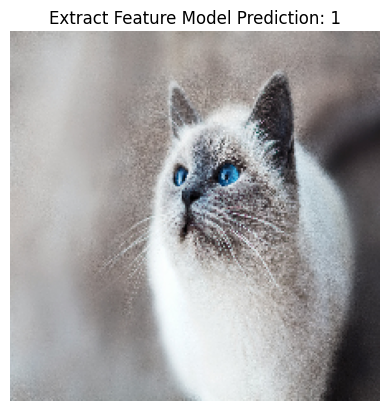

In [ ]:
# Get a batch of test images
test_images, _ = next(test_generator)  # Get one batch of images
index_to_plot = 1
test_image = test_images[index_to_plot]  # Select the second image in the batch

# Make a prediction using the extract feature model
prediction = extract_feat_model.predict(np.expand_dims(test_image, axis=0))

plt.imshow(test_image)
plt.title(f'Extract Feature Model Prediction: {np.argmax(prediction)}')
plt.axis('off')
plt.show()


Task 10: Plot a test image using Fine-Tuned Model (index_to_plot = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


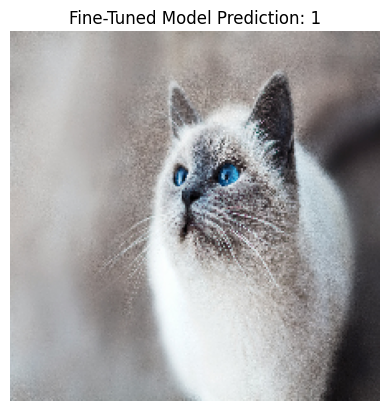

In [ ]:
# Make a prediction using the fine-tuned model (same model in this case)
prediction_ft = extract_feat_model.predict(np.expand_dims(test_image, axis=0))

plt.imshow(test_image)
plt.title(f'Fine-Tuned Model Prediction: {np.argmax(prediction_ft)}')
plt.axis('off')
plt.show()
